In [1]:
# Import packages 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
#Import dataset and display preview
er = pd.read_csv('employee_attrition_train.csv')

er.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,Travel_Rarely,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,Divorced,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,Travel_Rarely,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,Married,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
8,NaN,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
9,33.0,No,Non-Travel,530.0,Sales,16.0,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,Divorced,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2


In [3]:
#datatypes of columns
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [4]:
#checking null values
er.isna().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
#dropping null values and checking for null values
er.dropna(inplace=True)
er.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#check for duplicates
er.duplicated().sum()

0

In [7]:
%pip install seaborn

In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Hourly Rate by Job Involvement')

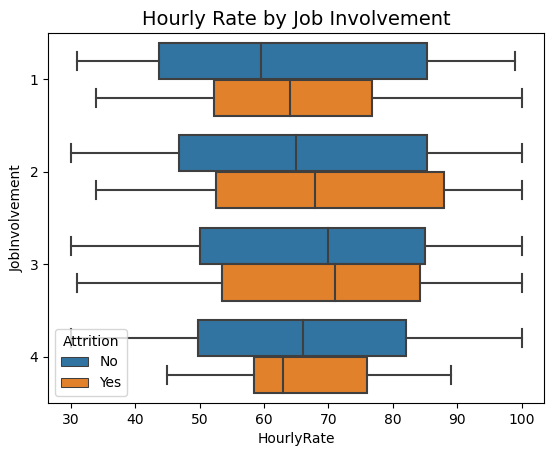

In [9]:
#create boxplot for job involvement and hourly rate based on employees who stayed and left the company 



sns.boxplot(data=er, x='HourlyRate', y='JobInvolvement', hue='Attrition', orient="h")
plt.title('Hourly Rate by Job Involvement', fontsize='14')

Text(0.5, 1.0, 'Job Involvement Histogram')

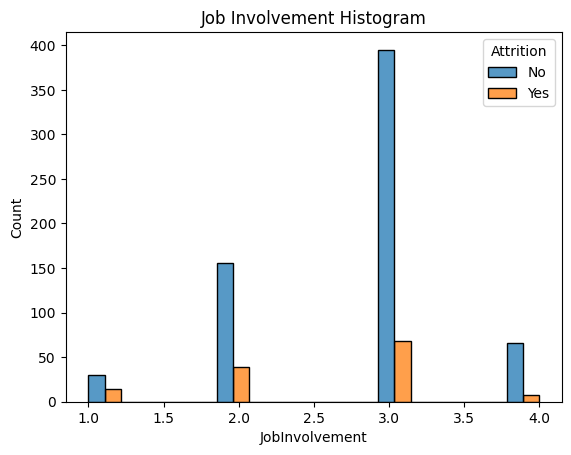

In [10]:
#create histogram based on job involvement 
sns.histplot(er, x='JobInvolvement', hue='Attrition', multiple='dodge')
plt.title('Job Involvement Histogram')

In [11]:
#Seens that employee group with the highest job involement(4) also has the least amount of employees that left the company
    #Could be possible that job involvement also correlates with years spent at the company which we could infer they have company loyalty

#Seems like the employees with the highest job involvement has the lowest average hourly rate
     #Could be possible employees with a lower salary are given the most tasks

<AxesSubplot:xlabel='JobInvolvement', ylabel='YearsAtCompany'>

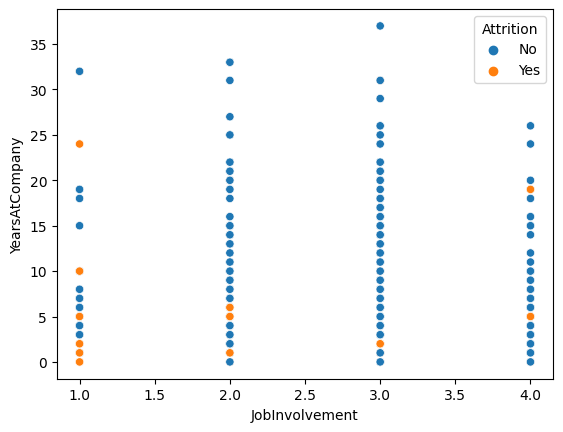

In [12]:
#create scatterplot on job involvement and Years At Company
sns.scatterplot(data=er, x='JobInvolvement', y='YearsAtCompany', hue='Attrition')

In [13]:
#It does not seem like a strong correlation between job involvement and Years At The Company which makes sense why Salary had a lower mean for employees with higher involvement

Text(0.5, 1.0, 'Job Satisfaction Histogram')

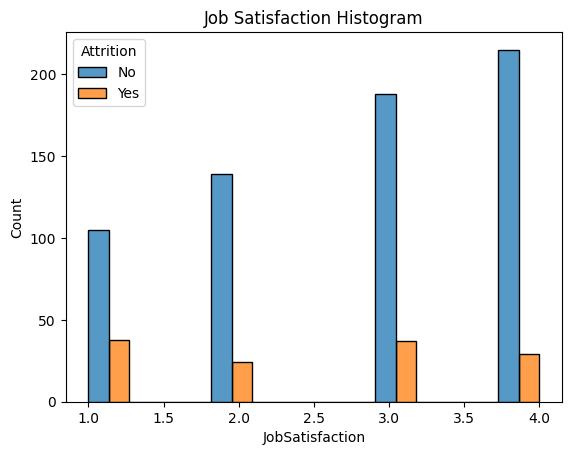

In [14]:
#create a histogram based on job satisfaction
sns.histplot(er, x='JobSatisfaction', hue='Attrition', multiple='dodge')
plt.title('Job Satisfaction Histogram')

In [15]:
#Employees with the least job satisfaction has the most employees who left but the difference does not seem to be that different from employees with higher satisfaction

Text(0.5, 1.0, 'Department Histogram')

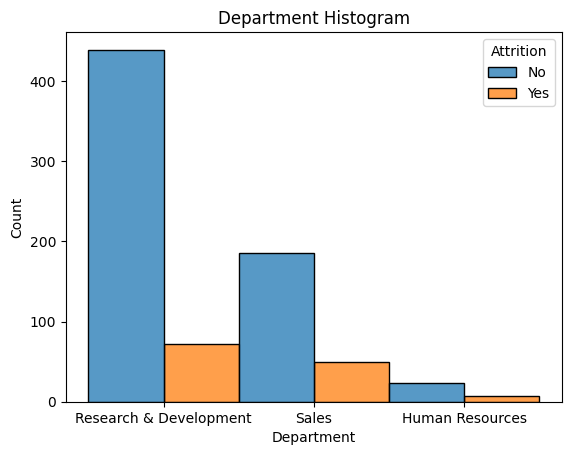

In [16]:
#Histogram based on department 
sns.histplot(er, x='Department', hue='Attrition', multiple='dodge')
plt.title('Department Histogram')

In [17]:
#It does not seem like any particular department significantly differs in the amount of employees that left the company

In [18]:
#Updating columns so can run heatmap correlation matrix

columns_to_exclude = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'] 
selected_columns = er.columns[~er.columns.isin(columns_to_exclude)]
er_numeric = er[selected_columns]

In [19]:
er_numeric.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,1126.0,1.0,2,1,997,4,66,3,4,4,17399,6615,9,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,216.0,6.0,2,1,178,2,84,3,2,2,4941,2819,6,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,337.0,7.0,1,1,1780,2,31,3,1,2,2679,4567,1,13,3,2,80,0,1,3,3,1,0,1,0


In [20]:
#chaning Attrition column to numeric values for heatmap
attrition_number = {'Yes': 1,'No': 0}
er_numeric['Attrition'] = er_numeric['Attrition'].map(attrition_number)

er_numeric['Attrition'] = er_numeric['Attrition'].astype(float)

<ipython-input-20-3799eda40fba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_numeric['Attrition'] = er_numeric['Attrition'].map(attrition_number)
<ipython-input-20-3799eda40fba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_numeric['Attrition'] = er_numeric['Attrition'].astype(float)


In [21]:
#making sure the Attrition column is numeric for the heatmap
er_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 1028
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       775 non-null    float64
 1   Attrition                 775 non-null    float64
 2   DailyRate                 775 non-null    float64
 3   DistanceFromHome          775 non-null    float64
 4   Education                 775 non-null    int64  
 5   EmployeeCount             775 non-null    int64  
 6   EmployeeNumber            775 non-null    int64  
 7   EnvironmentSatisfaction   775 non-null    int64  
 8   HourlyRate                775 non-null    int64  
 9   JobInvolvement            775 non-null    int64  
 10  JobLevel                  775 non-null    int64  
 11  JobSatisfaction           775 non-null    int64  
 12  MonthlyIncome             775 non-null    int64  
 13  MonthlyRate               775 non-null    int64  
 14  NumCompan

<function matplotlib.pyplot.show(close=None, block=None)>

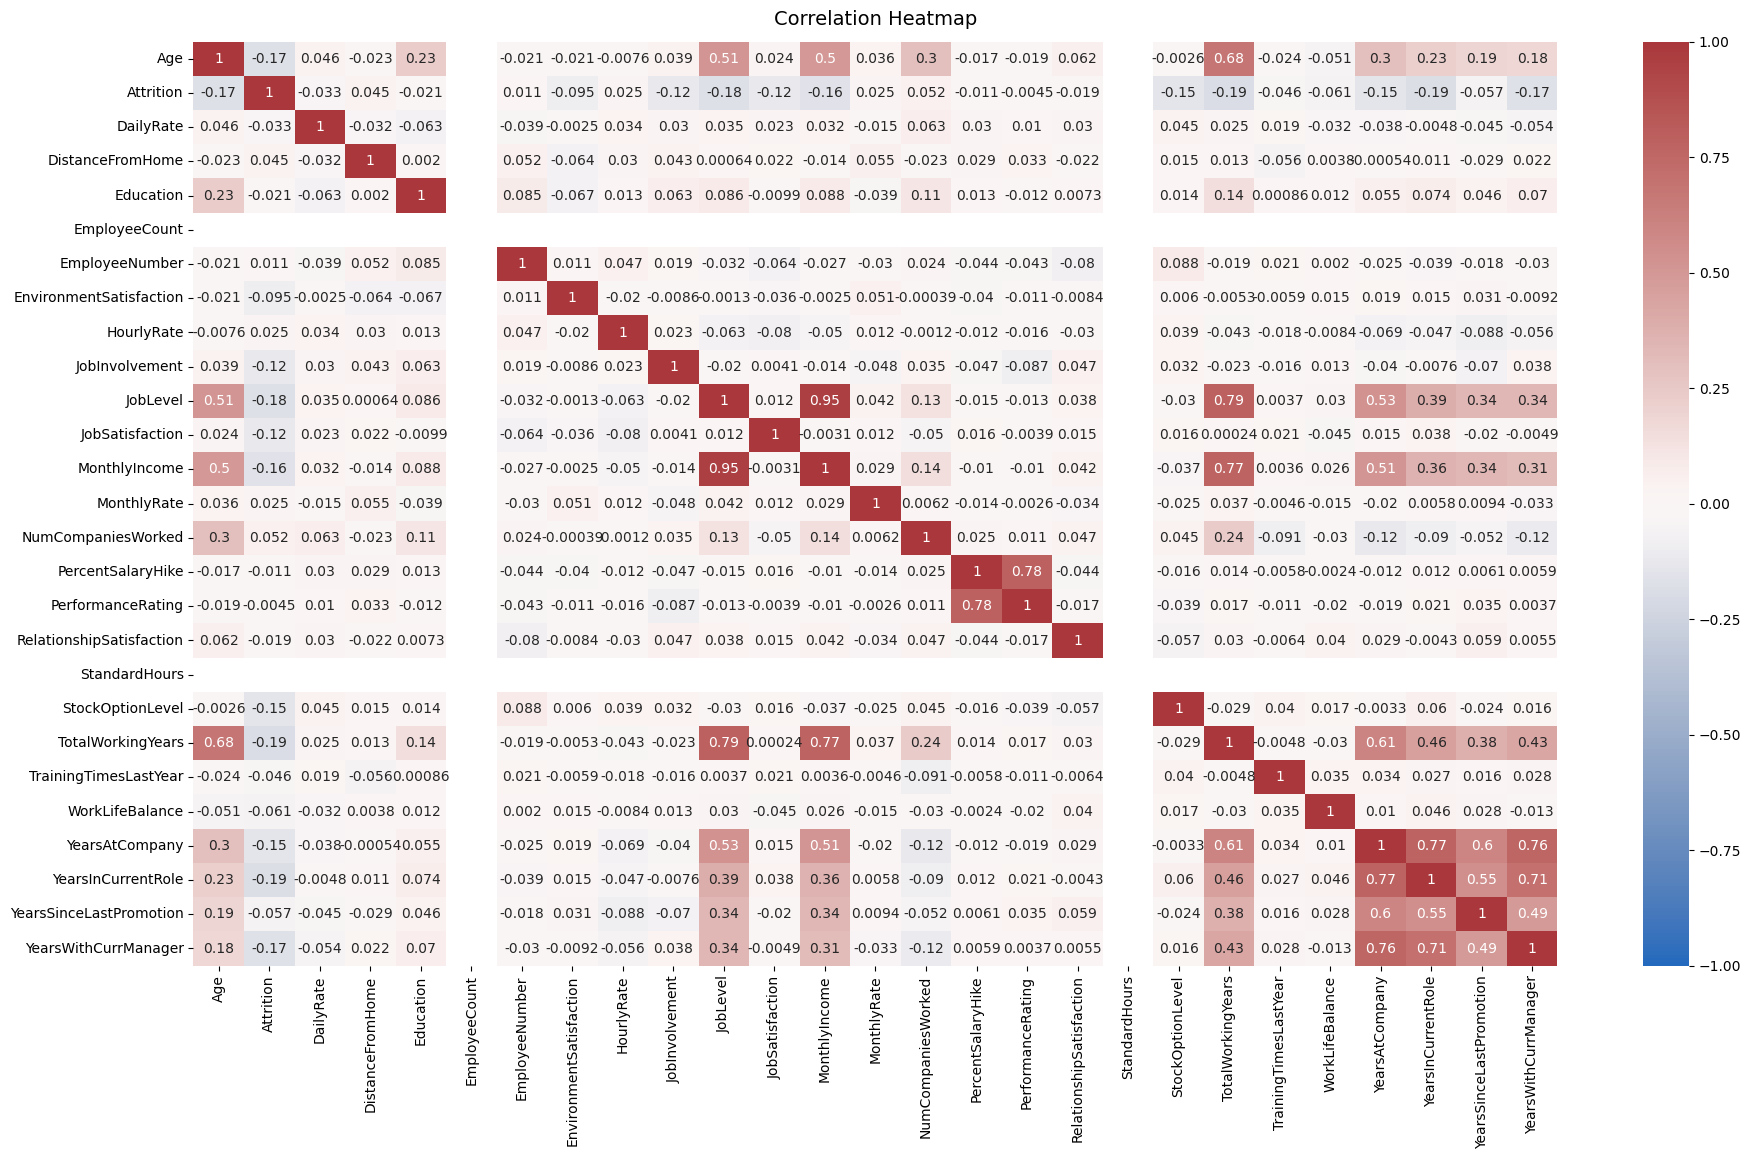

In [22]:
plt.figure(figsize=(22, 12))
heatmap = sns.heatmap(er_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
plt.show

In [23]:
#No strong correlation with Attrition, but their is some negative correlation with monthly income, Job level, Total Working Years, Years in Current Role, Years at company
#This shows employees with many years in the company and they have a high monthly income are less likely to leave

In [24]:
#assigning x and y variables
y = er_numeric['Attrition']

#creating dataset with no attrition column
exclude = ['Attrition'] 
selected = er_numeric.columns[~er_numeric.columns.isin(exclude)]
er_numeric_no_attrition = er_numeric[selected]

x = er_numeric_no_attrition 

x.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1126.0,1.0,2,1,997,4,66,3,4,4,17399,6615,9,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,216.0,6.0,2,1,178,2,84,3,2,2,4941,2819,6,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,337.0,7.0,1,1,1780,2,31,3,1,2,2679,4567,1,13,3,2,80,0,1,3,3,1,0,1,0


In [25]:
y.head(3)

0    0.0
1    0.0
2    1.0
Name: Attrition, dtype: float64

In [26]:
#splitting in training and testing data for logistic regression model
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [27]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(x_test)

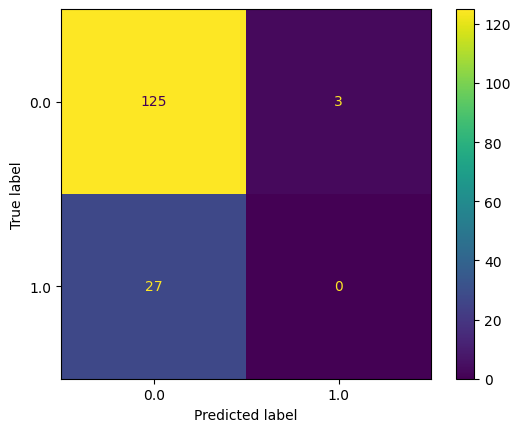

In [29]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [30]:
#True negatives: The number of people who did not leave that the model accurately predicted did not leave.(Upper left quadrant)

#False positives: The number of people who did not leave the model inaccurately predicted as leaving. (Upper right quadrant)

#False negatives: The number of people who left that the model inaccurately predicted did not leave (Bottom left quadrant)

#True positives: The number of people who left the model accurately predicted as leaving (Bottom right quadrant)

#This model has high true negatives but low true positives. The accuracy, F1 score, recall, and precision will be calculated next to get a better understanding

In [31]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.82      0.98      0.89       128
    Predicted would leave       0.00      0.00      0.00        27

                 accuracy                           0.81       155
                macro avg       0.41      0.49      0.45       155
             weighted avg       0.68      0.81      0.74       155



In [32]:
#The classification report shows an Accuracy of 81%, Precision of 68%, Recall of 81% and F1 Score of 74% (weighted averages)

In [33]:
#Creating a decision tree

# Create test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate datax
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [34]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [35]:
#fit tree modelto training data

In [36]:
%%time
tree1.fit(x_tr, y_tr)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.36 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'recall', 'accuracy', 'precision'})

In [37]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [38]:
# Check best AUC score on CV
tree1.best_score_

0.5972565111231688

In [39]:
#This score is not strong but will have a almost 60% chance of predicting employees who will leave

In [40]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [41]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

<ipython-input-40-0a8ace21a774>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.597257,0.292997,0.140789,0.180376,0.806495


In [42]:
#The Accuracy is good at 80%, the AUC is okay at 60% but the Recall at 14% and F1 score at 18% is low

In [43]:
#Creating Random Forest model to see if it gets better results

In [44]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [45]:
#Fit random forest to training data

In [46]:
%%time
rf1.fit(x_tr, y_tr)

/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'f1', 'recall', 'accuracy', 'precision'})

In [47]:
# Check best AUC score on CV
rf1.best_score_

0.6635309278350515

In [48]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [49]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

<ipython-input-40-0a8ace21a774>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.597257   0.292997  0.140789  0.180376  0.806495
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.663531      0.625  0.077632  0.130455  0.836538


In [50]:
#The Random Forest model may be better than the Decision Tree Model with a higher AUC, Precision and Accuracy. 

Text(0.5, 1.0, 'Monthly Income Histogram')

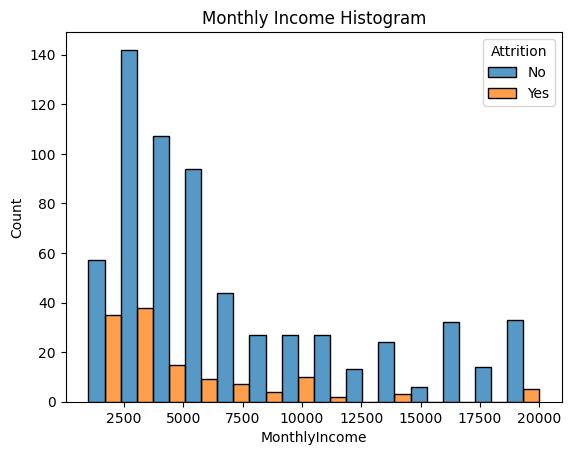

In [53]:
#create a histogram based on monthly income
sns.histplot(er, x='MonthlyIncome', hue='Attrition', multiple='dodge')
plt.title('Monthly Income Histogram')

Text(0.5, 1.0, 'Years At Company Histogram')

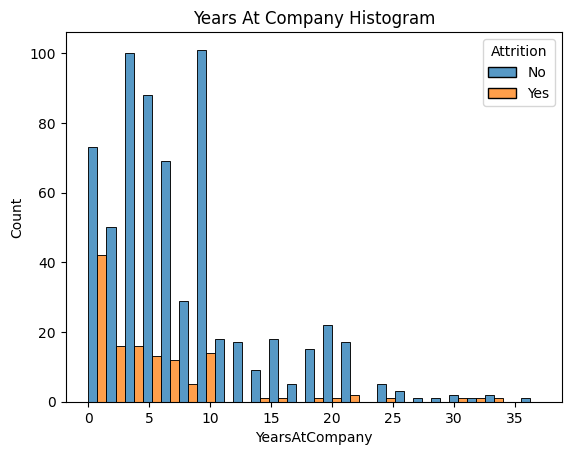

In [54]:
#create a histogram based on job satisfaction
sns.histplot(er, x='YearsAtCompany', hue='Attrition', multiple='dodge')
plt.title('Years At Company Histogram')

In [55]:
#Takeaways
#Monthly Income & Years At Company along with other working time measures had a decent negative correlation with Attrition
#After a monthly income of around $3750, employees seems less likely to leave the company
#The company should possibly increase the monthly income to $3750 for new employees they want to keep. After 10 years it seems very likely the employees will stay 
